# Extremely weak-field Zeeman effect
**PHYS 475, Lecture 16, 2019.02.22**

Instructions:
(To answer questions, add a "markdown" cell and type your answers there.)

1. Check the constants to verify that they are correct for the hydrogen ground states
2. Derive the value of the atomic unit for magnetic field.  (The answer is given below.)
2. Below in the cell beginning "next steps" is a function called np.kron().  What does this do?  Where have we seen this before?
3. Find the eigenstates in the small-B limit and the large-B limit.  (Numerically, what are "small B" and "large B"?) Explain how to get these results from perturbation theory.
   * Bonus: If you have time, _do_ the perturbation calculations in the code and compare with the "exact" values done here.
4. Modify the code such that B is in the x direction.  How does this change the eigenvalues?  How does this change the eigenstates?
5. The most common isotope of the alkali metal potassium (K-39) has nuclear spin I=3/2 and ground state hyperfine splitting of 462 MHz (in frequency units).  For K-39 the nuclear g-factor is gN = -1.4e-4.  (*Error:* this number is a factor of mp too small.) Adapt the code to calculate the hyperfine states of K-39.  What is the value of A for this state?
6. Create a plot showing the B dependence of the energy eigenvalues of K-39 for fields in the z direction.
7. The homework problem looks at deuterium.  What changes in the code to do this atom?

*Your name here*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, floatmode='maxprec')
#assuming atomic units throughout unless specified

In [2]:
#constants
alpha=1./137.; # fine structure constant
mp = 1836.; # proton mass
muB = 0.5; #Bohr magneton
muN = muB/mp; #nuclear magneton
mu0 = 4*np.pi*alpha**2; #permeability of vacuum
gs = 2.0; # electron spin gyromagnetic ratio
psi0 = 1/np.sqrt(np.pi); #value of wavefunction at origin
h = 4.136e-15; #Planck's constant in eV s
EH = 27.2; #Hartree energy in eV
B0 = 2.35e5; #atomic unit of magnetic field in T

In [3]:
# Properties of this atom (hydrogen)
S=1/2; I=1/2;
gN = 5.59;# nuclear gyromagnetic ratio (depends on atom and isotope)
#hyperfine amplitude coefficient (depends on atom and state)
A = 2*mu0/3*gs*muB*gN*muN*psi0**2 # McIntyre Eq. 11.10
print(f"A = {A:.2e} (a.u.) = {A*EH/h/1e6:.2f} MHz") # display A in MHz to compare with McIntyre Fig. 11.4

A = 2.16e-07 (a.u.) = 1422.41 MHz


In [4]:
#degeneracy of S and I.
#Must round so that these are stored as integers (the extra 0.2 is to ensure the rounding goes to the right number)
degS = np.int(2*S+1.2); degI = np.int(2*I+1.2); 

In [5]:
#create lists of possible Sz, Iz values in decreasing order
Szlist = np.arange(S,-S-1,-1);
Izlist = np.arange(I,-I-1,-1);

In [6]:
#Generating the individual spin matrices in the uncoupled basis
S2 = S*(S+1)*np.matrix(np.eye(degS)); #S-squared matrix
I2 = I*(I+1)*np.matrix(np.eye(degI)); #I-squared matrix
Sz = np.matrix(np.diag(Szlist)); #Sz matrix
Iz = np.matrix(np.diag(Izlist)); #Iz matrix

In [7]:
# list of the basis state  labels |Sz,Iz>
basislist = np.column_stack((np.diagonal(np.kron(Sz,np.eye(degI))),np.diagonal(np.kron(np.eye(degS),Iz)))); 

In [8]:
print(basislist) # display the row labels (Sz, Iz)

[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5  0.5]
 [-0.5 -0.5]]


In [9]:
# Generate other spin matrices
Sp=np.matrix(np.diag(np.sqrt(S*(S+1)-(Szlist*(Szlist+1))[1:]),1)); #S+ ladder matrix
Ip=np.matrix(np.diag(np.sqrt(I*(I+1)-(Izlist*(Izlist+1))[1:]),1)); #I+ ladder matrix
Sm=Sp.H; #S- ladder matrix
Im=Ip.H; #I- ladder matrix
Sx=(Sp+Sm)/2;
Ix=(Ip+Im)/2;
Sy=(Sp-Sm)/(0.+2j); #Sy matrix ("j" is sqrt(-1))
Iy=(Ip-Im)/(0.+2j);

In [10]:
# next steps: build hyperfine operator matrix and zeeman operator matrix
# We are assuming l=0 states here (otherwise HF is more complicated)

# hyperfine operator = A*(S dot I)
HF = A*(np.kron(Sz,Iz)+0.5*(np.kron(Sm,Ip)+np.kron(Sp,Im)));
# Zeeman operator, except for the magnetic field magnitude
ZnoB = gs*muB*np.kron(Sz,np.eye(degI))+gN*muN*np.kron(np.eye(degS),Iz); #multiply this by B to get the Zeeman operator
# magnetic field magnitude in atomic units:
B=0; # Change this value to test different magnetic field strengths
# Total hamiltonian
H = HF+B*ZnoB;

In [11]:
# print the Hamiltonian matrix
print(H)

[[ 5.407e-08  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -5.407e-08  1.081e-07  0.000e+00]
 [ 0.000e+00  1.081e-07 -5.407e-08  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  5.407e-08]]


In [12]:
#calculate and display the eigenvalues and eigenstates of H for this value of B
evs, ess = np.linalg.eigh(H) 
print(f"The eigenvalues are {evs}.")
print(f"The eigenvectors are the columns of the matrix:\n{ess}.")

The eigenvalues are [-1.622e-07  5.407e-08  5.407e-08  5.407e-08].
The eigenvectors are the columns of the matrix:
[[ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.     0.707]
 [-0.707  0.     0.     0.707]
 [ 0.     0.     1.     0.   ]].


In [13]:
# maximum frequency splitting in MHz
(max(evs)-min(evs))*EH/h/1e6 

1422.411016622688

In [14]:
# Generate data for the plots by stepping through B values.
Bmin = 0; # minimum B in atomic units
Bmax = 5e-7; # maximum B in atomic units
Bsteps = 101 # number of steps
Blist = np.linspace(Bmin, Bmax, Bsteps) # generate list of B values to evaluate
Elist = []; #empty list to store energy eigenvalues
for B in Blist:
    H = HF+B*ZnoB;
    evs, ess = np.linalg.eigh(H)
    Elist.append(np.sort(evs))
Earray = np.array(Elist)

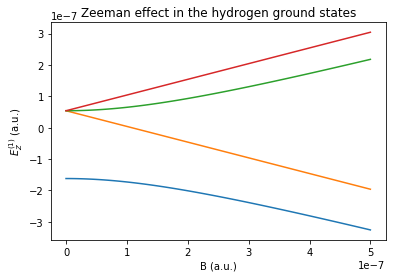

In [15]:
# plot the energy correction as a function of magnetic field amplitude
for x in range(degS*degI):
    plt.plot(np.array(Blist), Earray[:,x])
plt.xlabel("B (a.u.)");
plt.ylabel("$E^{(1)}_Z$ (a.u.)");
plt.title("Zeeman effect in the hydrogen ground states");
#plt.savefig("Zeeman-H-au.pdf")

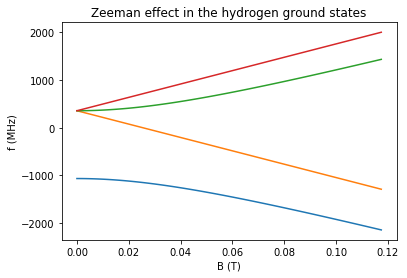

In [16]:
for x in range(degS*degI):
    plt.plot(np.array(Blist)*B0, Earray[:,x]*EH/h/1e6) # convert units to T and MHz
plt.xlabel("B (T)");
plt.ylabel("f (MHz)");
plt.title("Zeeman effect in the hydrogen ground states");
#plt.savefig("Zeeman-H-SI.pdf")